In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

--2020-06-10 15:48:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.77MB/s    in 48s     

2020-06-10 15:49:04 (6.37 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [5]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [0]:
#train_rock_dir = os.path.join(train_dir, 'rock')
#train_paper_dir = os.path.join(train_dir, 'paper')
#train_scissors_dir = os.path.join(train_dir, 'scissors')
#validation_rock_dir = os.path.join(validation_dir, 'rock')
#validation_paper_dir = os.path.join(validation_dir, 'paper')
#validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2    
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (200,200),
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (200,200),
    subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
#membuat lost function
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
model.fit( 
    train_generator,
    steps_per_epoch=16,  # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=15,
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=4,  # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2) 

Epoch 1/15
16/16 - 45s - loss: 1.7033 - accuracy: 0.3711 - val_loss: 1.0835 - val_accuracy: 0.5312
Epoch 2/15
16/16 - 44s - loss: 1.0594 - accuracy: 0.4688 - val_loss: 0.9810 - val_accuracy: 0.6250
Epoch 3/15
16/16 - 44s - loss: 0.8499 - accuracy: 0.6309 - val_loss: 0.8946 - val_accuracy: 0.6719
Epoch 4/15
16/16 - 45s - loss: 0.7744 - accuracy: 0.6504 - val_loss: 0.7423 - val_accuracy: 0.6875
Epoch 5/15
16/16 - 45s - loss: 0.7706 - accuracy: 0.7090 - val_loss: 0.6265 - val_accuracy: 0.7812
Epoch 6/15
16/16 - 45s - loss: 0.6267 - accuracy: 0.7637 - val_loss: 0.4892 - val_accuracy: 0.8203
Epoch 7/15
16/16 - 46s - loss: 0.4421 - accuracy: 0.8310 - val_loss: 0.4376 - val_accuracy: 0.8594
Epoch 8/15
16/16 - 45s - loss: 0.3430 - accuracy: 0.8828 - val_loss: 0.4015 - val_accuracy: 0.8750
Epoch 9/15
16/16 - 45s - loss: 0.2775 - accuracy: 0.9199 - val_loss: 0.3043 - val_accuracy: 0.8906
Epoch 10/15
16/16 - 46s - loss: 0.3001 - accuracy: 0.8945 - val_loss: 0.2623 - val_accuracy: 0.9141
Epoch 11/

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


Using TensorFlow backend.


Saving 0RA9rcrv8iVvuDDU.png to 0RA9rcrv8iVvuDDU.png
0RA9rcrv8iVvuDDU.png
paper


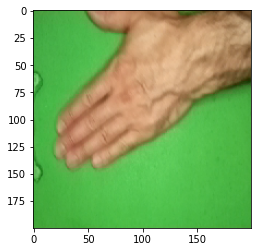

In [14]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes) 
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')